# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил Прибылов Н.А., студент гр. 9381, вариант 59


## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.


## Основные теоретические положения
Пусть требуется возвести некоторое число $x$ в степень $n\in\mathbb{N}$. Рассмотрим некоторые методы быстрого возведения в степень.

### Бинарный метод
Показатель степени $n$ представляется в двоичном виде, где последовательность нулей и единиц рассматривается слева направо и интерпретируется как путь получения числа $x^n$, а именно:  
$0$ - умножить текущий результат на $x$.  
$1$ - возвести текущий результат в квадрат, затем умножить на $x$.  
На начало алгоритма текущий результат принимается равным $1$ (или $x$, тогда первая цифра в двоичном представлении игнорируется).

Число операций:
$\lambda(n)+\nu(n)-1$, где:  
$\lambda(n)=\lfloor\log_2{n}\rfloor$ (уменьшенное на 1 количество цифр в двоичной записи числа $n$),  
$\nu(n)$ - вес Хэмминга (количество ненулевых элементов в (двоичной) записи числа $n$).

### Метод множителей
Степень $n$ представляется в виде $s*t$, где $s$ - наименьший простой делитель $n$. Далее бинарным методом вычисляется $x^s=y$, после чего находится $y^t$, что и будет являться результатом, так как $y^t=(x^s)^t=x^{st}=x^n$.

$y^t$ можно вычислять методом множителей или бинарным методом.  
В случае, если $n$ - простое, алгоритм применяется для $x^{n-1}$, откуда легко получить $x^n=x^{n-1}*x$.

### Аддитивная цепочка
Обобщением последовательностей степеней $n$, получаемых в вышеописанных методах, называется аддитивная цепочка.
Аддитивной цепочкой для $n\in\mathbb{N}$ называется последовательность:  
$1=a_0,a_1,a_2,...,a_m=n$, где:  
$a_i=a_j+a_k, k\leqslant j<i, i=1..n$  

Типы шагов:  
1) Удвоение, если $a_i=a_{i-1}+a_{i-1}$  
2) Звёздный, если $a_i=a_{i-1}+a_j$, при $j\leqslant i$  
3) Малый, если $\lambda(a_i)=\lambda(a_{i-1})$   

Длина минимальной аддитивной цепочки обозначается как $l(n)$.  
Бинарный метод даёт оценку $l(n)\leqslant\lambda(n)+\nu(n)-1$  
Метод множителей даёт оценку $l(nm)\leqslant l(n)+l(m)$  

### Теорема Брауэра
Для некоторого $k<\log_2\log_2n$ справедливо:  
$l(n)<(1+k^{-1})*\lceil\log_2n\rceil+2^{k-1}-k+2$

Следствия из теоремы:  
При $k=\lambda(\lambda(n))-2\lambda(\lambda(\lambda(n)))$ верно:  
1) $\lim_{n\to \infty}\frac{l(n)}{\lambda(n)}=1$  
2) $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{(\lambda(\lambda(n)))^2})$ - одна из наилучших верхних оценок $l(n)$  

### Алгоритм Брауэра
Является приближённым алгоритмом вычисления аддитивных цепочек.

Зафиксируем параметр $k\in\mathbb{N}$.  
Введём брауэровскую цепочку рекурсивно следующим образом:  
$B_k(n)=\begin{cases}
        1,2,3,\dots,2^k-1 & n<2^k \\
        B_k(q),2q,4q,8q,\dots,2^{k}q,n & n\geqslant 2^k, q=\lfloor n/2^k\rfloor
        \end{cases}$  

То есть, брауэровская цепочка выглядит как  
$B_k(n)=1,2,3,\dots,2^{k-1},
2a_j,4a_j,8a_j,\dots,2^{k}a_j,
2^{k}a_j+a_{j-1},2^{k+1}a_j+2a_{j-1},2^{k+2}a_j+4a_{j-1},\dots,2^{2k}a_j+2^{k}a_{j-1},
2^{2k}a_j+2^{k}a_{j-1}+a_{j-2},\dots,n,$  
где $a_j,a_{j-1},a_{j-2},\dots\in\{1,2,3,\dots,2^{k-1}\}$

Длина брауэровской цепочки:  
$l_B(n)=2^k+j(k+1)-2$

Процесс получения $n$ можно представить таким образом:  
$d = 2^k$  
$q_1=\lfloor n/d\rfloor, r_1=n\mod d \leftrightarrow n=q_{1}d+r_1, r_1\in[0,d]$  
$q_2=\lfloor q_1/d\rfloor, r_2=n\mod d \leftrightarrow q_1=q_{2}d+r_2, r_2\in[0,d]$  
$q_3=\lfloor q_2/d\rfloor, r_3=n\mod d \leftrightarrow q_2=q_{3}d+r_3, r_3\in[0,d]$  
...  
$q_{s-1}=q_{s}d+r_s$  
$q_s<d$  

Тогда $n$ можно записать как:  
$n = 2^{k}q_1+r_1 = 2^k(2^{k}q_2+r_2)+r1 =\dots= 2^k(2^k(\dots(2^{k}q_s+r_s)\dots)+r_2)+r_1$  
Иными словами, $n$ представляется в $2^k$-чной системе счисления:  
$n=\sum_{i=0}^{j}a_{i}2^{ik},  a_j\ne0$

### Звёздные цепочки
Аддитивная цепочка называется звёздной, если состоит только из звёздных шагов:  
$a_i=a_{i-1}+a_j$, при $j\leqslant i$  
Обозначим длину минимальной звёздной цепочки как $l^*(n)$  
$l^*(n)\geqslant l(n)$   


### Гипотеза Шольца-Брауэра
$l^*(2^n-1)\leqslant l^*(n)+n-1$  
$l(2^n-1)\leqslant l(n)+n-1, n\leqslant 64$  


### Алгоритм дробления вектора индексов
Является точным алгоритмом для нахождения минимальной звёздной цепочки.

Введём вектор индексов $\{r_i\}_{i=1}^{m-1}$, где $r_i=\{x: 1\leqslant x\leqslant i\}$  
Тогда звёздный шаг можно представить как $a_i=a_{i-1}+a_{r_{i-1}}, 2 \leqslant i \leqslant m$  

Рассмотрим вектор индексов $\{r_i\}_{i=1}^q \cup {\{{\rho}_j \}}_{j=q+1}^m$, где:  
$\rho_j= \{x:1\leqslant x\leqslant j\}$, ${\{r_i\}}_{i=1}^q$ - фиксированная часть, ${\{{\rho}_j\}}_{j=q+1}^m$ - меняющаяся часть.  

Наибольшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q} \cup \{q+1,q+2,\dots,m\}$.  
Наименьшее значение $a_m$ достигается при векторе индексов ${\{r_i\}}_{i=1}^{q}\cup\{1,1,\dots,1\}$.  

$a_{max} = a_{q+1}*2^{m-q}$  
$a_{min} = a_{q+1}+m-q$  

Алгоритм:
1. Во внешнем цикле просматриваем аддитивные цепочки длины $m$, начиная от $m=\bar{l}(n)=\lceil log_2(n) \rceil$ до $m=\underline{l}(n)=\lambda(n)+\nu(n)-1$, на каждой итерации выбираем некоторое $q$ ($1 \leqslant q \leqslant m-1$, например $q=\lfloor(m/2)\rfloor$);
2. Во внутреннем цикле перебираем все возможные фиксированные части вектора индексов $\{r_i\}_{i=1}^q$ (коих $q!$ штук), находим $a_{max}$ и ${a}_{min}$, после чего:
 1. Если $n \notin [a_{min},a_{max}]$, то переходим к следующему набору $\{r_i\}_{i=1}^q$;
 2. Если $n\in [a_{min},a_{max}]$, то перебираем все возможные меняющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ (коих $m!/q!$ штук), для каждого строим звёздную цепочку по вектору индексов $\{r_i\}\cup\{\rho_j\}$:
  1. Если последний элемент цепочки $a_m=n$, то цепочка найдена, поиск прекращается;
  2. Если все возможные изменяющиеся части вектора индексов ${\{{\rho}_j\}}_{j=q+1}^m$ исчерпаны, то переходим к следующему набору $\{r_i\}_{i=1}^q$.


## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.

## Порядок выполнения работы
1. Применить бинарный метод и метод множителей для $x^n$, где $n⩾30$, для 2-3 значений $n$ (значения $n$ выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.  
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $k$, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.  
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n>500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.  
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.  
5. Проверить гипотезу Шольца–Брауэра для $1<n⩽10$ на алгоритме дробления вектора индексов. Сделать выводы.  
6. *Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.*  


## Выполнение работы

### 1. Бинарный метод и метод множителей
Возьмём $n=31,33,34,35,42$:

#### $n=31$:
##### Бинарный метод:
$31_{10}=11111_2$  
$x, x*x=x^2, x^2*x=x^3, x^3*x^3=x^6, x^6*x=x^7, x^7*x^7=x^{14}, x^{14}*x=x^{15}, x^{15}*x^{15}=x^{30}, x^{30}*x=x^{31}$  
Число операций: 8  
##### Метод множителей:
$31$ - простое, рассмотрим $m=n-1=30$:  
$m=3*10$  
$3_{10}=11_2$, $10_{10}=1010_2$  
$x, x*x=x^2, x^2*x=x^3=y$,  
$y, y*y=y^2, y^2*y^2=y^4, y^2*y=y^5, y^5*y^5=y^{10}$,  
$m=(x^3)^{10}, m*x=x^{31}$  
Число операций: 7  

#### $n=32$:
##### Бинарный метод:
$32_{10}=100001_2$  
$x, x^2, x^4, x^8, x^{16}, x^{32}$  
Число операций: 5  
##### Метод множителей:
$m=2*16$ 
$2_{10}=10_2$, $16_{10}=10000_2$  
$x, x^2=y$,  
$y, y^2, y^4, y^8, y^{16}$,  
$m=(x^3)^{11}=x^{33}$  
Число операций: 5  

#### $n=33$:
##### Бинарный метод:
$33_{10}=100001_2$  
$x, x^2, x^4, x^8, x^{16}, x^{32}, x^{33}$  
Число операций: 6  
##### Метод множителей:
$m=3*11$ 
$3_{10}=11_2$, $11_{10}=1011_2$  
$x, x^2, x^3=y$,  
$y, y^2, y^4, y^5, y^{10}, y^{11}$,  
$m=(x^3)^{11}=x^{33}$  
Число операций: 7  

#### $n=34$:
##### Бинарный метод:
$34_{10}=100010_2$  
$x, x^2, x^4, x^8, x^{16}, x^{17}, x^{34}$  
Число операций: 7  
##### Метод множителей:
$m=2*17$ 
$5_{10}=101_2$, $17_{10}=10001_2$  
$x, x^2=y$,  
$y, y^2, y^4, y^8, y^16, y^17$,  
$m=(x^5)^{7}=x^{35}$  
Число операций: 7 

#### $n=35$:
##### Бинарный метод:
$35_{10}=100011_2$  
$x, x^2, x^4, x^8, x^{16}, x^{17}, x^{34}, x^{35}$  
Число операций: 7  
##### Метод множителей:
$m=5*7$ 
$5_{10}=101_2$, $11_{10}=111_2$  
$x, x^2, x^4, x^5=y$,  
$y, y^2, y^3, y^6, y^7$,  
$m=(x^5)^{7}=x^{35}$  
Число операций: 7  

#### $n=42$:
##### Бинарный метод:
$42_{10}=101010_2$  
$x, x^2, x^4, x^5, x^{10}, x^{20}, x^{21}, x^{42}$  
Число операций: 7  
##### Метод множителей:  
$m=3*14$  
$3_{10}=11_2$, $14_{10}=1110_2$  
$x, x^2, x^3=y$,  
$y, y^2, y^3, y^6, y^7, y^{14}$,  
$m=(x^3)^{14}=x^{42}$  
Число операций: 7


| n  | Число операций  бинарным методом | Число операций  методом множителей |
|----|----------------------------------|------------------------------------|
| 31 | 8                                | 7                                  |
| 32 | 5                                | 5                                  |
| 33 | 6                                | 7                                  |
| 34 | 7                                | 7                                  |
| 35 | 7                                | 7                                  |
| 42 | 7                                | 7                                  |


Можно сделать вывод, что при $2^k+1$ бинарный метод приводит к результату за меньшее количество операций, в остальных случаях метод множителей работает за меньшее или такое же количество операций, как и бинарный.  

### Алгоритм Брауэра

In [34]:
def brauer_chain(n, k):
    d = 2**k
    chain = []
    if n < d:
        chain += [i for i in range(1, d)]
    else:
        q = n//d
        chain = brauer_chain(q, k)
        chain += [(2**i)*q for i in range(1, k+1)]
        chain.append(n)
    return chain


kList = [1,2,3,4]
nList = [31,32,33,34,35,42,271,314,555,789,1618,2718,31415]
chains = [(n, k, brauer_chain(n, k)) for n in nList for k in kList]
print("Цепочки Брауэра:")
for chain in chains:
    print("n = {:<7} k = {:<4} l_B(n) = {}\nB_k(n) = {}\n".format(chain[0], chain[1], len(chain[2]), chain[2]))


Цепочки Брауэра:
n = 31      k = 1    l_B(n) = 9
B_k(n) = [1, 2, 3, 6, 7, 14, 15, 30, 31]

n = 31      k = 2    l_B(n) = 9
B_k(n) = [1, 2, 3, 2, 4, 7, 14, 28, 31]

n = 31      k = 3    l_B(n) = 11
B_k(n) = [1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 31]

n = 31      k = 4    l_B(n) = 20
B_k(n) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 31]

n = 32      k = 1    l_B(n) = 11
B_k(n) = [1, 2, 2, 4, 4, 8, 8, 16, 16, 32, 32]

n = 32      k = 2    l_B(n) = 9
B_k(n) = [1, 2, 3, 4, 8, 8, 16, 32, 32]

n = 32      k = 3    l_B(n) = 11
B_k(n) = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 32]

n = 32      k = 4    l_B(n) = 20
B_k(n) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 32]

n = 33      k = 1    l_B(n) = 11
B_k(n) = [1, 2, 2, 4, 4, 8, 8, 16, 16, 32, 33]

n = 33      k = 2    l_B(n) = 9
B_k(n) = [1, 2, 3, 4, 8, 8, 16, 32, 33]

n = 33      k = 3    l_B(n) = 11
B_k(n) = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 33]

n = 33      k = 4    l_B(n) = 20
B_k(n) = [1, 2, 3, 4, 5, 6, 7,

#### Результаты:

| n  | k | Цепочка Брауэра                                                      | Длина цепочки |
|:-:|:-:|:-:|:-:|
| 31 | 1 | [1, 2, 3, 6, 7, 14, 15, 30, 31]                                      | 9             |
| 31 | 2 | [1, 2, 3, 2, 4, 7, 14, 28, 31]                                       | 9             |
| 31 | 3 | [1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 31]                                 | 11            |
| 31 | 4 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 31] | 20            |
|||Минимальная|7|

| n  | k | Цепочка Брауэра                                                       | Длина цепочки |
|:-:|:-:|:-:|:-:|
| 33 | 1 | [1, 2, 2, 4, 4, 8, 8, 16, 16, 32, 33]                                 | 11            |
| 33 | 2 | [1, 2, 3, 4, 8, 8, 16, 32, 33]                                        | 9             |
| 33 | 3 | [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 33]                                  | 11            |
| 33 | 4 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 33] | 20            |
|||Минимальная|7|

| n  | k | Цепочка Брауэра                                                       | Длина цепочки |
|:-:|:-:|:-:|:-:|
| 42 | 1 | [1, 2, 2, 4, 5, 10, 10, 20, 21, 42, 42]                               | 11            |
| 42 | 2 | [1, 2, 3, 4, 8, 10, 20, 40, 42]                                       | 9             |
| 42 | 3 | [1, 2, 3, 4, 5, 6, 7, 10, 20, 40, 42]                                 | 11            |
| 42 | 4 | [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 42] | 20            |
|||Минимальная|8|

|n|k|Цепочка Брауэра|Длина цепочки|
|:-:|:-:|:-:|:-:|
|271|1|[1, 2, 2, 4, 4, 8, 8, 16, 16, 32, 33, 66, 67, 134, 135, 270, 271]|17|
|271|2|[1, 2, 3, 2, 4, 4, 8, 16, 16, 32, 64, 67, 134, 268, 271]|15|
|271|3|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 33, 66, 132, 264, 271]|15|
|271|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 16, 32, 64, 128, 256, 271]|25|
|||Минимальная|12|

|n|k|Цепочка Брауэра|Длина цепочки|
|:-:|:-:|:-:|:-:|
|314|1|[1, 2, 2, 4, 4, 8, 9, 18, 19, 38, 39, 78, 78, 156, 157, 314, 314]|17|
|314|2|[1, 2, 3, 2, 4, 4, 8, 16, 19, 38, 76, 78, 156, 312, 314]|15|
|314|3|[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 39, 78, 156, 312, 314]|15|
|314|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 2, 4, 8, 16, 19, 38, 76, 152, 304, 314]|25|
|||Минимальная|12|

|n|k|Цепочка Брауэра|Длина цепочки|
|:-:|:-:|:-:|:-:|
|555|1|[1, 2, 2, 4, 4, 8, 8, 16, 17, 34, 34, 68, 69, 138, 138, 276, 277, 554, 555]|19|
|555|2|[1, 2, 3, 4, 8, 8, 16, 32, 34, 68, 136, 138, 276, 552, 555]|15|
|555|3|[1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 8, 16, 32, 64, 69, 138, 276, 552, 555]|19|
|555|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 4, 8, 16, 32, 34, 68, 136, 272, 544, 555]|25|
|||Минимальная|13|

|n|k|Цепочка Брауэра|Длина цепочки|
|:-:|:-:|:-:|:-:|
|789|1|[1, 2, 3, 6, 6, 12, 12, 24, 24, 48, 49, 98, 98, 196, 197, 394, 394, 788, 789]|19|
|789|2|[1, 2, 3, 6, 12, 12, 24, 48, 49, 98, 196, 197, 394, 788, 789]|15|
|789|3|[1, 2, 3, 4, 5, 6, 7, 2, 4, 8, 12, 24, 48, 96, 98, 196, 392, 784, 789]|19|
|789|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 6, 12, 24, 48, 49, 98, 196, 392, 784, 789]|25|
|||Минимальная|13|

|n|k|Цепочка Брауэра|Длина цепочки|
|:-:|:-:|:-:|:-:|
|1618|1|[1, 2, 3, 6, 6, 12, 12, 24, 25, 50, 50, 100, 101, 202, 202, 404, 404, 808, 809, 1618, 1618]|21|
|1618|2|[1, 2, 3, 2, 4, 6, 12, 24, 25, 50, 100, 101, 202, 404, 404, 808, 1616, 1618]|18|
|1618|3|[1, 2, 3, 4, 5, 6, 7, 6, 12, 24, 25, 50, 100, 200, 202, 404, 808, 1616, 1618]|19|
|1618|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 12, 24, 48, 96, 101, 202, 404, 808, 1616, 1618]|25|
|||Минимальная|14|

|n|k|Цепочка Брауэра|Длина цепочки|
|:-:|:-:|:-:|:-:|
|31415|1|[1, 2, 3, 6, 7, 14, 15, 30, 30, 60, 61, 122, 122, 244, 245, 490, 490, 980, 981, 1962, 1963, 3926, 3926, 7852, 7853, 15706, 15707, 31414, 31415]|29|
|31415|2|[1, 2, 3, 2, 4, 7, 14, 28, 30, 60, 120, 122, 244, 488, 490, 980, 1960, 1963, 3926, 7852, 7853, 15706, 31412, 31415]|24|
|31415|3|[1, 2, 3, 4, 5, 6, 7, 14, 28, 56, 61, 122, 244, 488, 490, 980, 1960, 3920, 3926, 7852, 15704, 31408, 31415]|23|
|31415|4|[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 28, 56, 112, 122, 244, 488, 976, 1952, 1963, 3926, 7852, 15704, 31408, 31415]|30|
|||Минимальная|20|

Алгоритм Брауэра работает быстро, но находит не минимальную аддитивную цепочку. Можно заметить, что зачастую среди первых $2^k-1$ элементов есть лишние, никак не помогающие в построении цепочки. Также можно заметить повторяющиеся элементы в случае, когда $2^{k}q=n$. Алгоритм можно оптимизировать, исключив лишние и повторяющиеся элементы.

### Алгоритм дробления вектора индексов

In [31]:
import math
import time


def make_max_vector(lower, upper):
    return [i for i in range(lower, upper + 1)]


def decrease_vector(vector, start=0):
    for i in range(len(vector)-1, -1, -1):
        if vector[i] == 1:
            vector[i] = i + 1 + start
        else:
            vector[i] -= 1
            break
    return vector


def make_star_chain(vector):
    chain = [1]
    for i in vector:
        chain.append(chain[-1] + chain[i - 1])
    return chain


def split_index_vector_chain(n):
    if n < 1:
        return []

    lmin = math.ceil(math.log2(n))
    lmax = math.floor(math.log2(n)) + bin(n).count('1') - 1

    for m in range(lmin, lmax + 1):
        q = m // 2
        ri = make_max_vector(1, q)

        for _ in range(math.factorial(q)):
            aq = make_star_chain(ri)[-1]
            amax = aq * 2**(m - q)
            amin = aq + m-q

            if n < amin or n > amax:
                decrease_vector(ri)
                continue
            else:
                pi = make_max_vector(q + 1, m)
                for _ in range(math.factorial(m) // math.factorial(q)):
                    ai = make_star_chain(ri + pi)
                    if ai[-1] == n:
                        return ai
                    decrease_vector(pi, q)
            decrease_vector(ri)

    return []


n = int(input("n = "))
print("Поиск аддитивной цепочки для {}...".format(n))
start = time.time()
res = split_index_vector_chain(n)
end = time.time()
print("Цепочка: {}\nДлина: {}\nПоиск занял {} секунд".format(res, len(res), end-start))

n = 250
Поиск аддитивной цепочки для 250...
Цепочка: [1, 2, 4, 8, 16, 32, 48, 50, 100, 200, 250]
Длина: 11
Поиск занял 2.142794609069824 секунд


#### Результаты:

|n|Минимальная аддитивная цепочка|Длина|Время, с|
|:-:|:-:|:-:|:-:|
| 31 | [1, 2, 4, 8, 10, 20, 30, 31] | 8 | <0.1 |
| 33 | [1, 2, 4, 8, 16, 32, 33] | 7 | <0.1 |
| 42 | [1, 2, 4, 8, 16, 32, 40, 42] | 8 | <0.1 |
| 271 | [1, 2, 4, 8, 16, 32, 64, 68, 69, 138, 207, 271] | 12 | 8 |
| 314 | [1, 2, 4, 8, 16, 32, 64, 96, 104, 208, 312, 314] | 12 | 10 |
| 555 | [1, 2, 4, 8, 16, 32, 64, 72, 136, 137, 209, 418, 555] | 13 | 101 |
| 789 | [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 768, 784, 788, 789] | 14 | 1109 |

Алгоритм дробления вектора индексов действительно находит минимальную аддитивную цепочку, но для относительно больших $n$ требуется много времени на поиск.

#### Сравнение алгоритмов:
Сравним длины аддитивных цепочек, полученных различными методами:

|n|Бинарный метод|Метод множителей|Алгоритм Брауера|Алгоритм дробления вектора индексов|
|:-:|:-:|:-:|:-:|:-:|
|31|9|8|9|8|
|42|8|8|9|8|
|271|12|12|15|12|
|314|12|12|15|12|
|555|13|13|15|13|
|789|13|13|15|14|
|1618|14|14|18|14|
|31415|24|20|23|20|
|3141592|36|36|33|27|

Можно сделать вывод, что приближённые методы, такие как алгоритм Брауэра, подходят для вычислений аддитивных цепочек для больших чисел, если точность не слишком важна. Для точных расчётов следует применять методы, такие как алгоритм дробления вектора индексов, гарантированно вычисляющие минимальную цепочку, пусть и за большое время. Бинарный метод и метод множителей подходят для небольших чисел, где в среднем выдают минимальный или близкий к минимальному результат.  

### Проверка первого следствия теоремы Брауэра


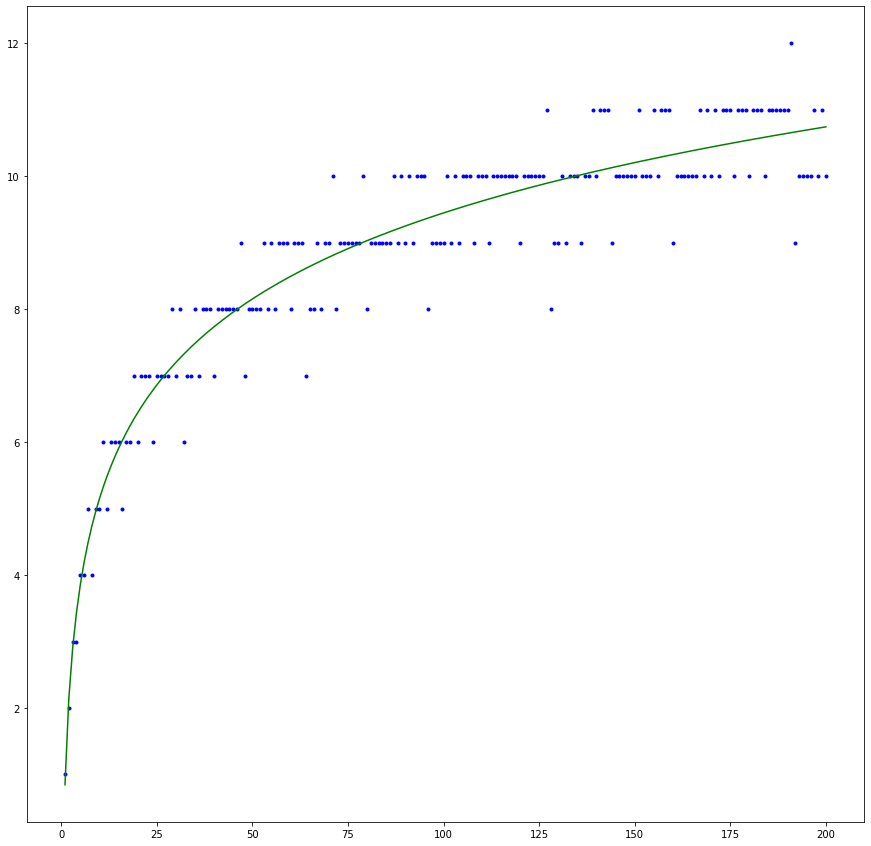

In [42]:
x = [i for i in range(1, 201)]
y = [len(split_index_vector_chain(i)) for i in x]

M = matrix([[sum([float((math.log(i) ** 2)) for i in x]), sum([float(math.log(i)) for i in x])],
            [sum([float(math.log(i)) for i in x]), len(x)]])
V = vector([sum([float(y[i] * math.log(x[i])) for i in range(len(x))]), 
            sum(y)])
res = M.solve_right(V)

plt.figure(figsize = (15, 15))
plt.scatter(x, y, color = 'b', marker = '.')
plt.plot(x, [res[0]*log(i) + res[1] for i in x], color = 'g')
plt.show()

Из полученного графика можно сделать вывод, что множество значений длин звёздных цепочек аппроксимируется логарифмической кривой, что подтверждает следствие теоремы Брауэра: $\lim_{n\to \infty}\frac{l(n)}{\lambda(n)}=1$.

### Проверка гипотезы Шольца–Брауэра


In [43]:
for i in range(1, 11):
    print("n = {}, {} <= {}".format(i, len(split_index_vector_chain(2**i -  1)), len(split_index_vector_chain(i))+i-1))

n = 2, 3 <= 3
n = 3, 5 <= 5
n = 4, 6 <= 6
n = 5, 8 <= 8
n = 6, 9 <= 9
n = 7, 11 <= 11
n = 8, 11 <= 11
n = 9, 13 <= 13
n = 10, 14 <= 14


#### Результаты:

| $n$ | $ l^*(2^n-1) $ | $ l^*(n) + n - 1 $ |
| :-: | :-: | :-: |
| 2 | 3 | 3 |
| 3 | 5 | 5 |
| 4 | 6 | 6 |
| 5 | 8 | 8 |
| 6 | 9 | 9 |
| 7 | 11 | 11 |
| 8 | 11 | 11 |
| 9 | 13 | 13 |
| 10 | 14 | 14 |


Гипотеза подтверждается для $1 \leqslant n\leqslant 10$.

## Вывод

Были реализованы точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, а именно:
1. Бинарный метод
2. Метод множителей
3. Алгоритм Брауэра
4. Алгоритм дробления вектора индексов

Выяснено, что в бинарный метод и метод множителей дают хорошие результаты для небольших $n$, алгоритм Брауэра даёт работает быстро для достаточно больших $n$, но даёт лишь приближённый результат, а алгоритм дробления вектора индексов даёт точный результат, но затратен по времени. Кроме того, было проверено первое следствие из теоремы Брауэра и гипотеза Шольца-Брауэра для $1 \leqslant n\leqslant 10$ (с помощью которой можно быстрее получать минимальные длины цепочек для $n = {2}^{k} - 1$).